In [1]:
import os 
import pandas as pd
import glob 
import seaborn as sns 
import matplotlib.pyplot as plt 

os.chdir('/mnt/BioHome/jreyna/jreyna/projects/dchallenge/')

## Loading the gencode reference

In [2]:
gencode = pd.read_table('results/refs/gencode/v30/gencode.v30.annotation.bed', header=None)
gencode = gencode.iloc[:, [4,6]]
gencode.set_index(6, inplace=True)
gencode = gencode.squeeze()
gencode = gencode.to_dict()

## Loading the coloc data 

In [3]:
data = []
coloc_glob = 'results/main/coloc/Results/Colocalization_SMKN_FDR/*/*/*/FINAL_Summary_Coloc_Gene_SNP_Pairs.bed'
coloc_fns = sorted(glob.glob(coloc_glob))

In [4]:
for fn in coloc_fns:
    
    df = pd.read_table(fn)
    
    fname_segs = fn.split('/')
    gwas = fname_segs[5]
    eqtl = fname_segs[6]
    ge = fname_segs[7]

    df['gwas'] = gwas
    df['eqtl'] = eqtl
    df['ge'] = ge
    
    data.append(df)

In [5]:
all_data = pd.concat(data)

# add the gene name
all_data['gene_name'] = all_data.geneName.replace(gencode)

## Check data sources

In [6]:
check_sources = all_data.drop_duplicates(['eqtl', 'ge'])
check_sources = check_sources[['eqtl', 'ge']]

In [7]:
pd.set_option('display.max_rows', 100) 
display(check_sources.set_index('eqtl'))
pd.set_option('display.max_rows', 20) 

,ge
eqtl,
BLUEPRINT,T-cell
BLUEPRINT,monocyte
BLUEPRINT,neutrophil
GENCORD,LCL
GENCORD,T-cell
GENCORD,fibroblast
GTEx,LCL
GTEx,adipose_subcutaneous
GTEx,adipose_visceral


## Extract expression sources revelant to T1D

In [8]:
t1d_ge_sources = [
 'monocyte_Pam3CSK4',
 'monocyte_LPS',
 'monocyte_IAV',
 'monocyte_naive',
 'T-cell',
 'CD4_T-cell_anti-CD3-CD28',
 'CD4_T-cell_naive',
 'Th1-17_memory',
 'CD8_T-cell_naive',
 'Th1_memory',
 'NK-cell_naive',
 'Tfh_memory',
 'Treg_memory',
 'B-cell_naive',
 'monocyte',
 'neutrophil',
 'pancreatic_islet',
 'blood',
 'fibroblast',
 'pancreas']
t1d_data = all_data.loc[all_data['ge'].isin(t1d_ge_sources)]

In [9]:
# filtering on the pp_H4_Coloc_Summary
t1d_data = t1d_data.loc[t1d_data.pp_H4_Coloc_Summary > 0.75]

## Plotting study summary

In [10]:
study_summary = t1d_data.value_counts(['gwas', 'eqtl', 'ge']).to_frame().reset_index()
study_summary.rename(columns={0:'count'}, inplace=True)

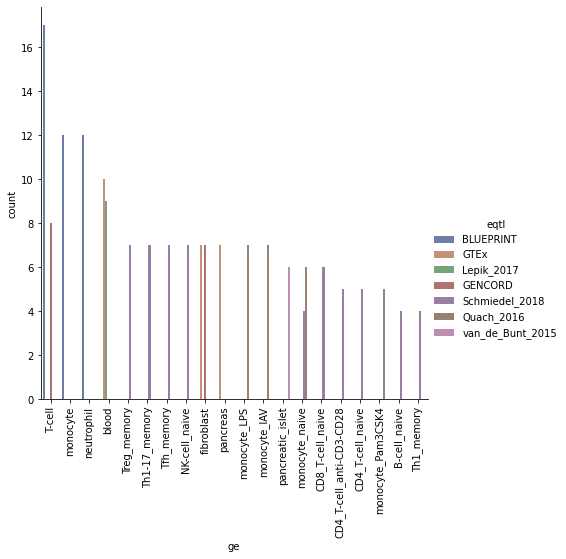

In [11]:
#sns.barplot(hue='eqtl', y='count', x='ge', data=study_summary)

# fig, ax = plt.subplots()
# Draw a nested barplot by species and sex
g= sns.catplot(data=study_summary, kind="bar",
            x="ge", y="count", hue="eqtl",
            ci="sd", palette="dark", alpha=.6, height=6)

for x in g.ax.get_xticklabels():
    x.set_rotation(90)

## Gene Summary

In [12]:
gene_summary = t1d_data.groupby(['gwas', 'eqtl', 'ge']).gene_name.value_counts()

In [13]:
pd.set_option('display.max_rows', gene_summary.shape[0]) 
display(gene_summary.to_frame())
pd.set_option('display.max_rows', 20) 

gene_name
gwas                 eqtl             ge                       gene_name            
T1D_34012112_Gaulton BLUEPRINT        T-cell                   AC091132.1          1
                                                               AC091132.5          1
                                                               AC126544.2          1
                                                               AP005482.1          1
                                                               HIST1H4J            1
                                                               HIST1H4L            1
                                                               KANSL1              1
                                                               KANSL1-AS1          1
                                                               LRRC37A             1
                                                               LRRC37A2            1
                                                               NSF                 1
                                                               SKAP2               1
                                                               ZBED9               1
                                                               ZKSCAN3             1
                                                               ZNF165              1
                                                               ZSCAN23             1
                                                               ZSCAN26             1
                                      monocyte                 AC091132.5          1
                                                               AC126544.2          1
                                                               ARL17B              1
                                                               BAK1                1
                                                               HOTAIRM1            1
                                                               HOXA1               1
                                                               ITPR3               1
                                                               KANSL1              1
                                                               KANSL1-AS1          1
                                                               LRRC37A             1
                                                               LRRC37A2            1
                                                               NSF                 1
                                      neutrophil               AC126544.2          1
                                                               HMGN4               1
                                                               HOTAIRM1            1
                                                               HOXA-AS2            1
                                                               HOXA1               1
                                                               HOXA5               1
                                                               KANSL1              1
                                                               KANSL1-AS1          1
                                                               LRRC37A             1
                                                               LRRC37A2            1
                                                               NSF                 1
                                                               SKAP2               1
                     GENCORD          T-cell                   AC091132.5          1
                                                               AC126544.2          1
                                                               AL513548.4          1
                                                               ARL17B              1
                                                               KANSL1-AS1       

In [14]:
gene_uniq_summary = t1d_data.drop_duplicates(['eqtl', 'ge', 'gene_name']).gene_name.value_counts()
gene_uniq_summary = gene_uniq_summary.to_frame()
gene_uniq_summary.sort_values('gene_name', ascending=False, inplace=True)

In [15]:
gene_uniq_summary.columns = ['Number of Unique Colocalizations in ALL Studies']

In [16]:
pd.set_option('display.max_rows', gene_uniq_summary.shape[0]) 
display(gene_uniq_summary)
pd.set_option('display.max_rows', 20) 

,Number of Unique Colocalizations in ALL Studies
KANSL1-AS1,24
AC126544.2,24
LRRC37A2,23
SKAP2,12
LRRC37A,11
NSF,9
KANSL1,8
AP005482.1,8
ARL17A,5
RMI2,4


In [21]:
for x in gene_uniq_summary.index.tolist():
    print(x)

KANSL1-AS1
AC126544.2
LRRC37A2
SKAP2
LRRC37A
NSF
KANSL1
AP005482.1
ARL17A
RMI2
HOXA1
AL513548.4
HOTAIRM1
ITPR3
AC091132.5
ZSCAN26
PLEKHM1
HOXA5
ZSCAN9
ARL17B
ZNF165
HOXA-AS2
ARHGAP27
BTN2A1
AC009054.2
ZSCAN23
ZBED9
CPE
HIST1H4L
ZKSCAN3
AC009121.1
AC007014.2
HIST1H4J
SEH1L
BAK1
HMGN4
AC091132.1
WNT3
